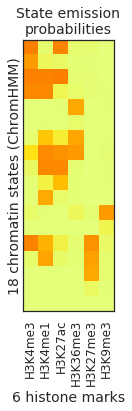

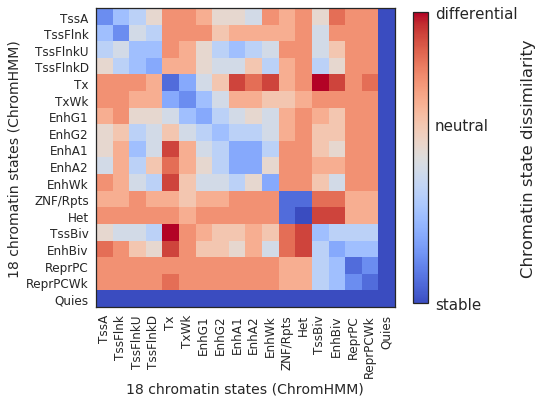

In [47]:
%matplotlib inline

import os as os
import collections as col
import itertools as itt
import pickle as pck
import time as ti
import json as js

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

import numpy as np
import numpy.random as rng
import scipy.stats as stats
import pandas as pd
from pandas.errors import EmptyDataError
import seaborn as sns
import pulp as plp

# What does this do?
# Plot CMM18 state labels and colors
# for supplementary material

date = '20180807'

run_plot_state_emissions = True
save_figures = True

sns.set(style='white',
        font_scale=1.5,
        rc={'font.family': ['sans-serif'],
            'font.sans-serif': ['DejaVu Sans']})

np.seterr('raise')

fhgfs_base = '/TL/deep/fhgfs/projects/pebert/thesis/projects/statediff'
cache_dir = os.path.join(fhgfs_base, 'caching/notebooks')

journal = 'bmc_genbio'
res = 'print_hi'
fig_sizes = js.load(open('/home/pebert/work/code/mpggit/statediff/annotation/misc/fig_sizes.json'))
fig_sizes = fig_sizes[journal]
resolution = fig_sizes['resolution']

scorings = ['emission', 'replicate']
segmentations = ['cmm18', 'ecs18', 'ecs10']
cmm_state_emissions = '/home/pebert/work/code/mpggit/statediff/annotation/chromhmm_18/emissions_18_core_K27ac.txt'
cmm_dataset = os.path.join(fhgfs_base, 'sciddo/deep/cmm18', 'sciddo-data_hg38_cmm18.h5')

sns.set(style='white',
        font_scale=1.5,
        rc={'font.family': ['sans-serif'],
            'font.sans-serif': ['DejaVu Sans']})

base_out = '/TL/deep-external01/nobackup/pebert/cloudshare/mpiinf/phd/chapter_projects/statediff'
fig_supp = os.path.join(base_out, 'figures', 'pub', 'supp')
fig_main = os.path.join(base_out, 'figures', 'pub', 'main')
fig_collect = os.path.join(base_out, 'figures', 'pub', 'collection')


def to_rgb(color):
    r, g, b = color.split(',')
    r = int(r) / 255
    g = int(g) / 255
    b = int(b) / 255
    return r,g,b


def plot_emission_matrix():
    """
    """
    
    fig, ax = plt.subplots(figsize=(4, 5),
                           nrows=1, ncols=1, sharex=False, sharey=False)
    
    
    
    infos = pd.read_csv(cmm_state_emissions, sep='\t',
                        header=0, index_col=0)

    reorder = ['H3K4me3', 'H3K4me1', 'H3K27ac', 'H3K36me3', 'H3K27me3', 'H3K9me3']
    infos = infos[reorder]
    
    ax.imshow(infos, cmap='Wistia')
    
    hist_labels = infos.columns
        
    ax.set_xticks(np.arange(0, 6))
    ax.set_yticks(np.arange(0, 18))
    
    ax.set_yticklabels([])
    #ax.set_xticklabels([])
    ax.set_xticklabels(hist_labels, rotation=90, fontsize=12)
    
    ax.set_ylabel('18 chromatin states (ChromHMM)', fontsize=14, labelpad=-5)
    ax.set_xlabel('6 histone marks', fontsize=14, labelpad=5)
    
    ax.set_title('State emission\nprobabilities', fontsize=14)
            
    return fig, []


def plot_state_scores():
    
    fig, ax = plt.subplots(figsize=fig_sizes['two_col']['square'],
                           nrows=1, ncols=1, sharex=False, sharey=False)
    
    infos = pd.read_csv(cmm_state_emissions, sep='\t',
                        header=0, index_col=0)
    
    with pd.HDFStore(cmm_dataset, 'r') as hdf:
        mat = hdf['/scoring/penem/matrix']
    
    img = ax.imshow(mat.values, cmap='coolwarm')
    cbar = plt.colorbar(img, ax=ax, shrink=0.8)
    cbar.set_label('Chromatin state dissimilarity')
    cbar.set_ticks([-8, 0, 5])
    cbar.ax.set_yticklabels(['stable', 'neutral', 'differential'])
    
    ax.set_xticks(np.arange(0, 18, 1))
    ax.set_xticklabels([l.split('_')[1] for l in infos.index],
                       fontsize=12, rotation=90)
    
    ax.set_yticks(np.arange(0, 18, 1))
    ax.set_yticklabels([l.split('_')[1] for l in infos.index], fontsize=12)
    
    
    ax.set_ylabel('18 chromatin states (ChromHMM)', fontsize=14, labelpad=5)
    ax.set_xlabel('18 chromatin states (ChromHMM)', fontsize=14, labelpad=5)
        
    return fig, [cbar]
    
    
    


def plot_state_emissions():

    fig, exart = plot_emission_matrix()

    if save_figures:
        outname = 'fig_cmm18_state_emissions_MS'
        outfolder = fig_collect

        out_pdf = os.path.join(outfolder, outname + '.pdf')
        fig.savefig(out_pdf, bbox_inches='tight', extra_artists=exart)
        
        out_png = os.path.join(outfolder, outname + '.png')
        fig.savefig(out_png, bbox_inches='tight', transparent=True,
                    extra_artists=exart, dpi=resolution[res])

    fig, exart = plot_state_scores()
    if save_figures:
        outname = 'fig_cmm18_state_scores_MS'
        outfolder = fig_collect
        
        out_png = os.path.join(outfolder, outname + '.png')
        fig.savefig(out_png, bbox_inches='tight', transparent=True,
                    extra_artists=exart, dpi=resolution[res])
        
        out_pdf = os.path.join(outfolder, outname + '.pdf')
        fig.savefig(out_pdf, bbox_inches='tight', extra_artists=exart)
        
        out_svg = os.path.join(outfolder, outname + '.svg')
        fig.savefig(out_svg, bbox_inches='tight',
                    extra_artists=exart)
    return 0

if run_plot_state_emissions:
    plot_state_emissions()